In [1]:
#Importing all the module that we will use

#to read csv and manipulate dataframe
import pandas as pd 

#to modify array
import numpy as np 

#to do some data visualization
import matplotlib.pyplot as plt

#importing the class to convert SMSs to a matrix of token counts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#Note that count vectorizer just counts the word frequencies
#TFIDF  vectorizer assigns a score

from sklearn.model_selection import train_test_split

#Importing the classifiers that we wil test 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Importing performance metrix to evaluate our models

from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

c:\python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#We define the two main function for our task
#one for get prediction from out classifier
#the other one to evaluate performance of the model based on different 
#key perfomance metrics
def get_predictions(clf, count_train, y_train, count_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(count_train,y_train)
    # predict using test data
    y_pred = clf.predict(count_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(count_test)
    #for fun: train-set predictions
    #train_pred = clf.predict(count_test)
    #print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob
def print_scores(y_test,y_pred,y_pred_prob):
    conf_matrix=confusion_matrix(y_test,y_pred)
    recall= recall_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    accuracy= accuracy_score(y_test,y_pred)
    roc= roc_auc_score(y_test, y_pred_prob[:,1])
    print('test-set confusion matrix:\n',conf_matrix ) 
    print("recall score: ",recall )
    print("precision score: ", precision)
    print("f1 score: ",f1 )
    print("accuracy score: ",   accuracy)
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))
    kpi=pd.DataFrame([[recall,precision,f1,accuracy,roc]], columns=['Recall','Precision','F1_Score','Accuracy','ROC-AUC'])
    return kpi

In [3]:
#Name of the file in the directory
name_path='data_spam.csv'
#reading the csv and converting in a df
csv_raw=pd.read_csv(name_path,index_col=0,encoding="ISO-8859-1")
#We need to inspect our dataframe 
print(csv_raw.head(2))
print(csv_raw.info())

  label                                                SMS
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
SMS      5572 non-null object
dtypes: object(2)
memory usage: 130.6+ KB
None


The dataset is composed by
        SMS
label      
ham    4825
spam    747
Our Dataset as pie chart:


Text(0,0.5,'')

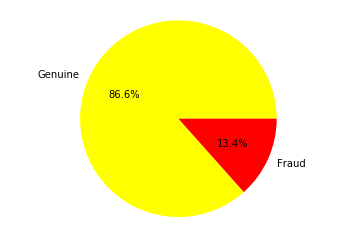

In [4]:
#We count how many genuine and fraud SMS are in the dataset
#We are going to group the dataset by label 
#and plot thorugh a pie chart
group_label=csv_raw.groupby(by='label').count()
print('The dataset is composed by')
print(group_label)
# We Plot Our Dataset
print("Our Dataset as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(group_label,autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellow','r'])
plt.axis('equal')
plt.ylabel('')

Probabilistic Note, if we pick a random SMS, on a frequentistic approach we have 13.4% of probability to pick a Fraudulent SMS.

In [5]:
#We need to create a dummy variable 1-0 for our dataset for faster test-training and later manipulation
df=csv_raw.copy()
b={'ham':True,'spam':False}
df['Status']=df['label'].map(b)
print(df.head())


  label                                                SMS  Status
0   ham  Go until jurong point, crazy.. Available only ...    True
1   ham                      Ok lar... Joking wif u oni...    True
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   False
3   ham  U dun say so early hor... U c already then say...    True
4   ham  Nah I don't think he goes to usf, he lives aro...    True


In [6]:
list_classifier=[MultinomialNB(),LogisticRegression(),RandomForestClassifier(),RandomForestClassifier(criterion='entropy')]
names=['MultinomialNaiveBayes','Logistic Regression', 'Random Forest Classifier', 'Random Forest Classifier crit=Entropy']
y=df['Status']
X_train, X_test, y_train, y_test = train_test_split(df['SMS'],y,test_size=0.33)

Naive Bayes--> Generative classifiers learn a model of joint probabilities p(x, y) and use Bayes rule to calculate p(x	y) to make a prediction
Logistic Regression --> Discriminative models learn the posterior probability p(x	y) “directly”

In [7]:
#In this section we will use count vectorizer for the three classifiers, selecting keywords and bi-grams 
results_df=pd.DataFrame(columns=['n_grams','Classifier','Recall','Precision','F1_Score','Accuracy','ROC-AUC'])
performance=pd.DataFrame()
for i in [[1,1],[2,2],[1,2]]:
    count_vectorizer=CountVectorizer(stop_words='english',ngram_range=(i))
    count_train=count_vectorizer.fit_transform(X_train.values)
    count_test=count_vectorizer.transform(X_test.values)
    for name, clf in zip(names,list_classifier):
        print('Classifier used',name)
        print('n-gram range is',i)
        print()
        y_pred, y_pred_prob = get_predictions(clf, count_train, y_train, count_test)
        n_grams=str(i)
        classifier=name
        loop_performance=pd.DataFrame()
        loop_performance=print_scores(y_test,y_pred,y_pred_prob)
        loop_performance['n_grams']=n_grams
        loop_performance['Classifier']=name
        performance=performance.append(loop_performance)
        print('__________________')
    

Classifier used MultinomialNaiveBayes
n-gram range is [1, 1]

test-set confusion matrix:
 [[ 225   24]
 [  11 1579]]
recall score:  0.9930817610062893
precision score:  0.9850280723643169
f1 score:  0.9890385217663639
accuracy score:  0.9809679173463839
ROC AUC: 0.9847414816498699
__________________
Classifier used Logistic Regression
n-gram range is [1, 1]

test-set confusion matrix:
 [[ 210   39]
 [   2 1588]]
recall score:  0.9987421383647799
precision score:  0.9760295021511985
f1 score:  0.9872552067143301
accuracy score:  0.977705274605764
ROC AUC: 0.98672930716577
__________________
Classifier used Random Forest Classifier
n-gram range is [1, 1]

test-set confusion matrix:
 [[ 212   37]
 [   7 1583]]
recall score:  0.9955974842767296
precision score:  0.9771604938271605
f1 score:  0.9862928348909658
accuracy score:  0.9760739532354541
ROC AUC: 0.9797858099062918
__________________
Classifier used Random Forest Classifier crit=Entropy
n-gram range is [1, 1]

test-set confusion ma

In [8]:
#Now we have to tidy our output 
print(performance.sort_values(['F1_Score'],ascending=False))



     Recall  Precision  F1_Score  Accuracy   ROC-AUC n_grams  \
0  0.996226   0.986301  0.991239  0.984774  0.981213  [1, 2]   
0  0.993082   0.985028  0.989039  0.980968  0.984741  [1, 1]   
0  0.998742   0.976030  0.987255  0.977705  0.986729  [1, 1]   
0  0.998742   0.975430  0.986948  0.977162  0.987454  [1, 2]   
0  0.995597   0.977160  0.986293  0.976074  0.979786  [1, 1]   
0  1.000000   0.970104  0.984825  0.973355  0.958266  [2, 2]   
0  0.996226   0.970588  0.983240  0.970636  0.973550  [1, 1]   
0  0.996855   0.969419  0.982946  0.970092  0.978794  [1, 2]   
0  0.998742   0.967113  0.982673  0.969549  0.972418  [1, 2]   
0  1.000000   0.945303  0.971883  0.949973  0.922260  [2, 2]   
0  0.999371   0.945271  0.971568  0.949429  0.927643  [2, 2]   
0  1.000000   0.931459  0.964513  0.936378  0.960011  [2, 2]   

                              Classifier  
0                  MultinomialNaiveBayes  
0                  MultinomialNaiveBayes  
0                    Logistic Regressi

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['SMS'],y,test_size=0.33)
#In this section we will use Tfidf vectorizer for the three classifiers, selecting keywords and bi-grams 
results_df=pd.DataFrame(columns=['n_grams','Classifier','Recall','Precision','F1_Score','Accuracy','ROC-AUC'])
performance=pd.DataFrame()
for i in [[1,1],[2,2],[1,2]]:
    tfidf_vectorizer=TfidfVectorizer(stop_words='english',ngram_range=(i))
    tfidf_train=tfidf_vectorizer.fit_transform(X_train.values)
    tfidf_test=tfidf_vectorizer.transform(X_test.values)
    for name, clf in zip(names,list_classifier):
        print('Classifier used',name)
        print('n-gram range is',i)
        print()
        y_pred, y_pred_prob = get_predictions(clf, tfidf_train, y_train, tfidf_test)
        n_grams=str(i)
        classifier=name
        loop_performance=pd.DataFrame()
        loop_performance=print_scores(y_test,y_pred,y_pred_prob)
        loop_performance['n_grams']=n_grams
        loop_performance['Classifier']=name
        performance=performance.append(loop_performance)
        print('__________________')

Classifier used MultinomialNaiveBayes
n-gram range is [1, 1]

test-set confusion matrix:
 [[ 184   60]
 [   0 1595]]
recall score:  1.0
precision score:  0.9637462235649547
f1 score:  0.9815384615384616
accuracy score:  0.967373572593801
ROC AUC: 0.9870574027442314
__________________
Classifier used Logistic Regression
n-gram range is [1, 1]

test-set confusion matrix:
 [[ 173   71]
 [   2 1593]]
recall score:  0.9987460815047022
precision score:  0.9573317307692307
f1 score:  0.9776004909481435
accuracy score:  0.9603045133224578
ROC AUC: 0.9891926614933964
__________________
Classifier used Random Forest Classifier
n-gram range is [1, 1]

test-set confusion matrix:
 [[ 206   38]
 [   3 1592]]
recall score:  0.9981191222570532
precision score:  0.9766871165644172
f1 score:  0.9872868217054264
accuracy score:  0.977705274605764
ROC AUC: 0.9783377871421963
__________________
Classifier used Random Forest Classifier crit=Entropy
n-gram range is [1, 1]

test-set confusion matrix:
 [[ 194 

In [10]:
#Now we have to tidy our output 
print(performance.sort_values(['F1_Score'],ascending=False))


     Recall  Precision  F1_Score  Accuracy   ROC-AUC n_grams  \
0  0.998119   0.976687  0.987287  0.977705  0.978338  [1, 1]   
0  0.995611   0.969475  0.982369  0.969005  0.982431  [1, 1]   
0  0.998746   0.965455  0.981818  0.967917  0.978196  [1, 2]   
0  0.994357   0.969438  0.981739  0.967917  0.978073  [1, 2]   
0  1.000000   0.963746  0.981538  0.967374  0.987057  [1, 1]   
0  0.998746   0.957332  0.977600  0.960305  0.989193  [1, 1]   
0  1.000000   0.952239  0.975535  0.956498  0.984066  [1, 2]   
0  0.999373   0.945433  0.971655  0.949429  0.939032  [2, 2]   
0  0.998746   0.944280  0.970750  0.947798  0.989144  [1, 2]   
0  1.000000   0.939340  0.968722  0.943991  0.938937  [2, 2]   
0  1.000000   0.926787  0.962002  0.931485  0.961191  [2, 2]   
0  1.000000   0.877338  0.934662  0.878738  0.961364  [2, 2]   

                              Classifier  
0               Random Forest Classifier  
0  Random Forest Classifier crit=Entropy  
0  Random Forest Classifier crit=Entro

In [ ]:
# We didn't make in depth analysis of overfitting/underfitting, next step will use cross folds validation
#As we saw in the pie chart, data are skewed. One test to do is to undersample the dataset 
#in order to get a less skewed dataset an analyze the results
